<a href="https://colab.research.google.com/github/shashank8794/Cat_Dog_classification/blob/master/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2
  
from google.colab import drive
import sys
from pathlib import Path

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base = Path('/content/drive/My Drive/catVSdog')
sys.path.append(str(base))
zip_path1 = base/'train.zip'
zip_path2 = base/'test1.zip'
!cp "{zip_path1}" .
!cp "{zip_path2}" .
!unzip -q train.zip
!unzip -q test1.zip
!rm train.zip
!rm test1.zip

In [0]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
#print(os.listdir("/content/train"))

In [0]:
images = os.listdir("/content/train")
categories = []
for image in images:
  category = image.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({
    'filename': images,
    'category': categories
})

In [6]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

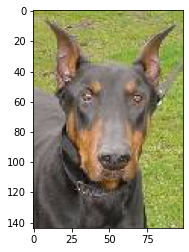

In [8]:
rng = random.choice(images)
image = load_img("/content/train/" + rng)
plt.imshow(image)

In [0]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'})

In [0]:
train_data, validate_data = train_test_split(df, test_size = 0.2, random_state = 42)
train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)

In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_data, 
    "/content/train/", 
    x_col='filename',
    y_col='category',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size= 15
)

Found 20000 validated image filenames belonging to 2 classes.


In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_data, 
    "/content/train/", 
    x_col='filename',
    y_col='category',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=15
)

Found 5000 validated image filenames belonging to 2 classes.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [14]:
history = model.fit_generator(
    train_generator, 
    epochs=50,
    validation_data=validation_generator,
    validation_steps=5000//15,
    steps_per_epoch=20000//15
    #callbacks=callbacks
)

Epoch 1/50
1333/1333 [==============================] - 155s 117ms/step - loss: 0.7569 - accuracy: 0.6284 - val_loss: 0.8003 - val_accuracy: 0.5944
Epoch 2/50
1333/1333 [==============================] - 148s 111ms/step - loss: 0.5512 - accuracy: 0.7232 - val_loss: 0.3438 - val_accuracy: 0.7607
Epoch 3/50
1333/1333 [==============================] - 146s 110ms/step - loss: 0.4944 - accuracy: 0.7645 - val_loss: 0.3572 - val_accuracy: 0.7984
Epoch 4/50
1333/1333 [==============================] - 147s 110ms/step - loss: 0.4615 - accuracy: 0.7868 - val_loss: 0.8624 - val_accuracy: 0.8132
Epoch 5/50
1333/1333 [==============================] - 146s 109ms/step - loss: 0.4399 - accuracy: 0.7977 - val_loss: 0.4215 - val_accuracy: 0.8532
Epoch 6/50
1333/1333 [==============================] - 144s 108ms/step - loss: 0.4109 - accuracy: 0.8206 - val_loss: 0.2496 - val_accuracy: 0.7043
Epoch 7/50
1333/1333 [==============================] - 142s 107ms/step - loss: 0.4035 - accuracy: 0.8205 - val_

In [0]:
model.save_weights("model.h5")

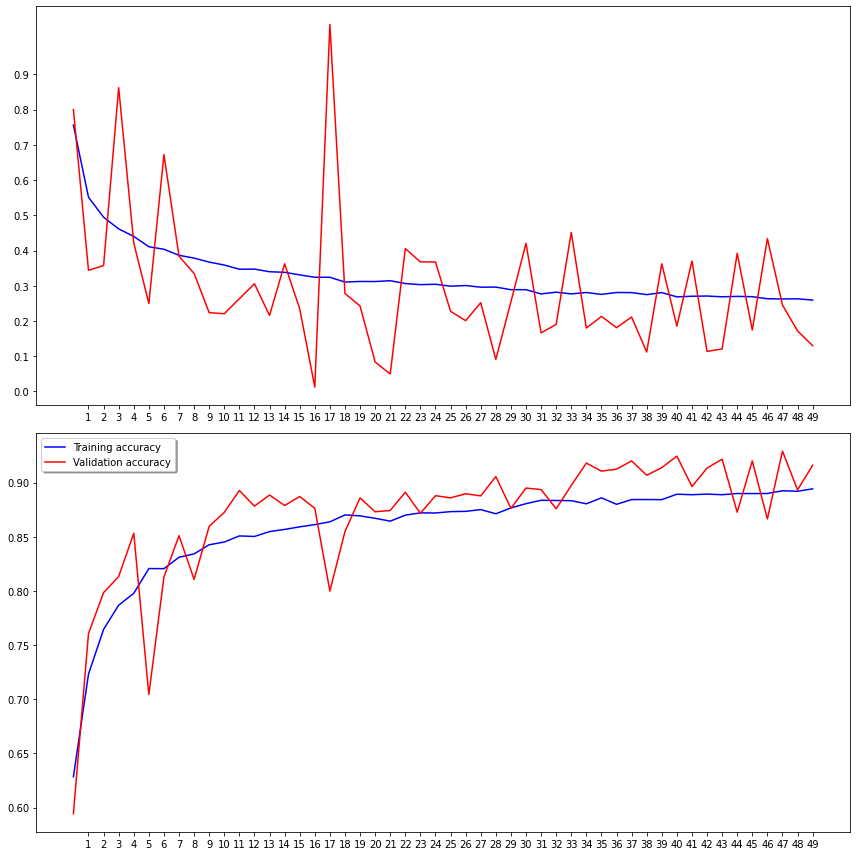

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [0]:
test_filenames = os.listdir("/content/test1")
test_data = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_data.shape[0]

In [19]:
test_data.head(10)

,filename
0,7078.jpg
1,3328.jpg
2,5157.jpg
3,8919.jpg
4,10431.jpg
5,8718.jpg
6,743.jpg
7,4307.jpg
8,707.jpg
9,10396.jpg


In [21]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_data, 
    "/content/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(128, 128),
    batch_size=15,
    shuffle=False
)

Found 12500 validated image filenames.


In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(12500/15))

In [0]:
test_data['class'] = np.argmax(predict, axis=-1)

In [24]:
test_data.head(10)

,filename,class
0,7078.jpg,0
1,3328.jpg,1
2,5157.jpg,1
3,8919.jpg,1
4,10431.jpg,0
5,8718.jpg,0
6,743.jpg,1
7,4307.jpg,1
8,707.jpg,1
9,10396.jpg,0


In [0]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_data['class'] = test_data['class'].replace(label_map)

In [26]:
test_data['class'].value_counts()

dog    6343
cat    6157
Name: class, dtype: int64

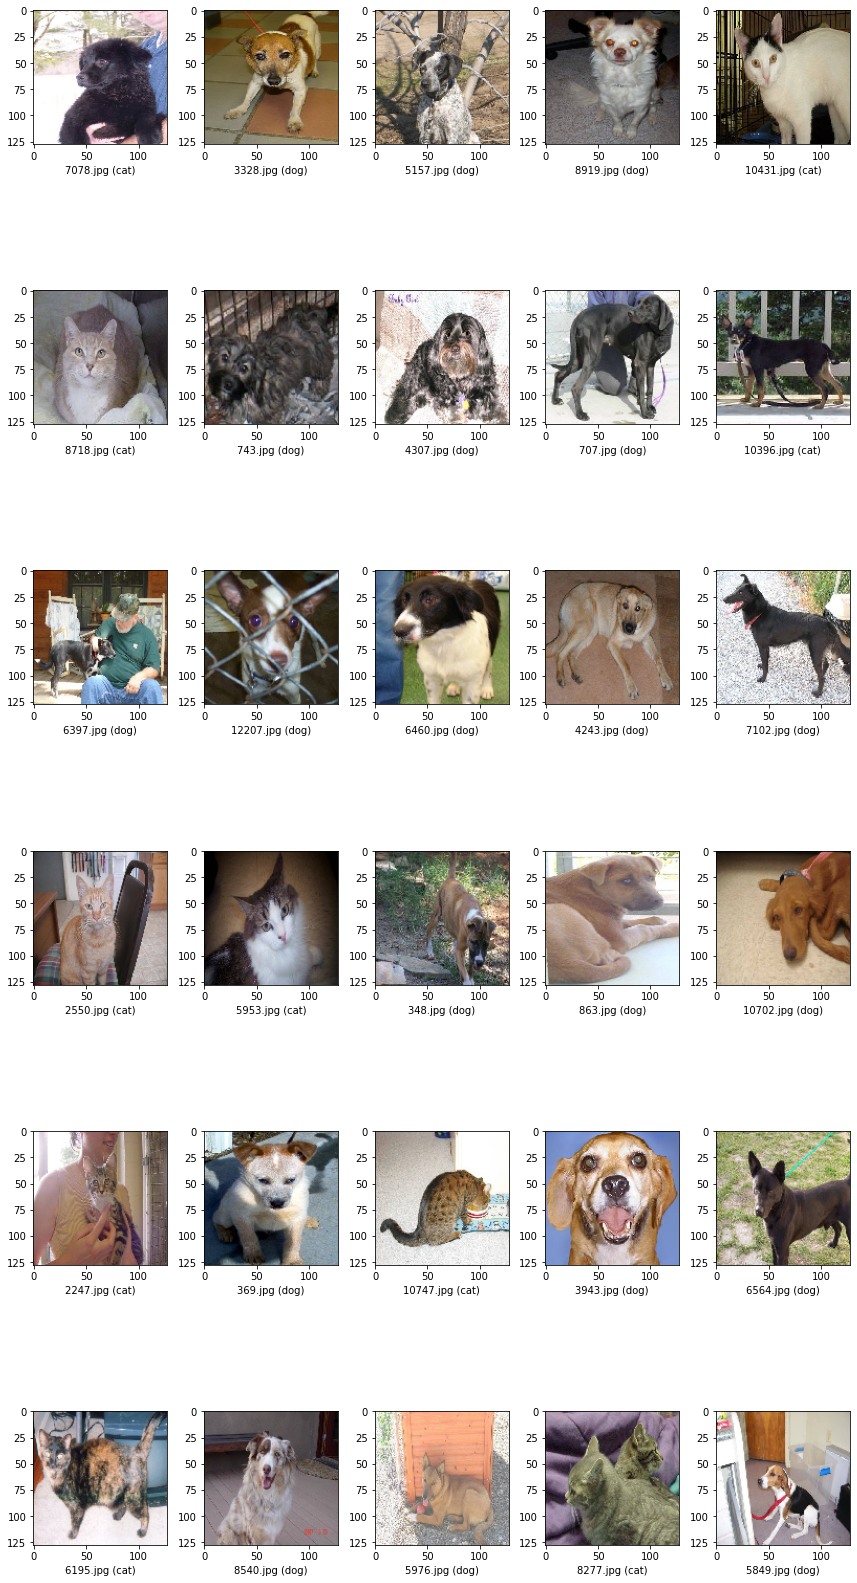

In [27]:
sample_test = test_data.head(30)
#sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    image_name = row['filename']
    category = row['class']
    img = load_img("/content/test1/"+image_name, target_size=(128,128))
    plt.subplot(6, 5, index+1)
    plt.imshow(img)
    plt.xlabel(image_name + ' (' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()